In [19]:
# Downloading the dataset
# !pwd
#ls local_training_data/dogs-cats/train
# !ls local_training_data/dogs-cats-small
import os, shutil

In [20]:
import tensorflow as tf

print('-- set gpu')
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

-- set gpu
TensorFlow version: 2.13.0
Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
# define dataset dir
original_dataset_dir = 'local_training_data/dogs-cats/train'
base_dir = 'local_training_data/dogs-cats-small'

In [22]:
# make directories
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
print('train_dir:', train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
print('validation_dir:', validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
print('test_dir:', test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
print('train_cats_dir:', train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
print('train_dogs_dir:', train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
print('validation_cats_dir:', validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
print('validation_dogs_dir:', validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
print('test_cats_dir:', test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)
print('test_dogs_dir:', test_dogs_dir)

train_dir: local_training_data/dogs-cats-small/train
validation_dir: local_training_data/dogs-cats-small/validation
test_dir: local_training_data/dogs-cats-small/test
train_cats_dir: local_training_data/dogs-cats-small/train/cats
train_dogs_dir: local_training_data/dogs-cats-small/train/dogs
validation_cats_dir: local_training_data/dogs-cats-small/validation/cats
validation_dogs_dir: local_training_data/dogs-cats-small/validation/dogs
test_cats_dir: local_training_data/dogs-cats-small/test/cats
test_dogs_dir: local_training_data/dogs-cats-small/test/dogs


In [23]:
# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [24]:
# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [25]:
# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [26]:
# Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [27]:
# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [28]:
# Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [29]:
# do sanity check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [30]:
# Building your network
from keras import layers
from keras import models

# define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [31]:
# compile the model
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [32]:
# Data preprocessing
# ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

# create data generator
# rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # target directory
    target_size=(150, 150), # Resizes all images to 150 × 150
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
# test generator
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [34]:
# fit the model
# calculate: steps_per_epoch => number of batches fetched
# batches = 20 samples, steps_per_epoch/batches = 100, then  2,000 samples
# steps_per_epoch = total_samples / batch_size
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


2023-10-07 09:19:47.716486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 99/100 [============================>.] - ETA: 0s - loss: 0.7885 - acc: 0.5475

2023-10-07 09:19:50.840004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 5s 39ms/step - loss: 0.7873 - acc: 0.5475 - val_loss: 0.7342 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 4s 37ms/step - loss: 0.6830 - acc: 0.6190 - val_loss: 0.7013 - val_acc: 0.5630
Epoch 3/30
100/100 [==============================] - 4s 37ms/step - loss: 0.7445 - acc: 0.6455 - val_loss: 0.5988 - val_acc: 0.6790
Epoch 4/30
100/100 [==============================] - 4s 36ms/step - loss: 0.6948 - acc: 0.6200 - val_loss: 0.6306 - val_acc: 0.6310
Epoch 5/30
100/100 [==============================] - 4s 36ms/step - loss: 0.6507 - acc: 0.6635 - val_loss: 0.5964 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 4s 37ms/step - loss: 0.6553 - acc: 0.6645 - val_loss: 1.0277 - val_acc: 0.5370
Epoch 7/30
100/100 [==============================] - 4s 37ms/step - loss: 0.6877 - acc: 0.6010 - val_loss: 0.6911 - val_acc: 0.5890
Epoch 8/30
100/100 [==============================] - 4s 36ms/step - loss: 0.629

In [35]:
model.save('trained_models/cats_and_dogs_small_1.h5')

/Users/jcolamendy/python/ml-tutorials/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
import matplotlib.pyplot as plt

history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

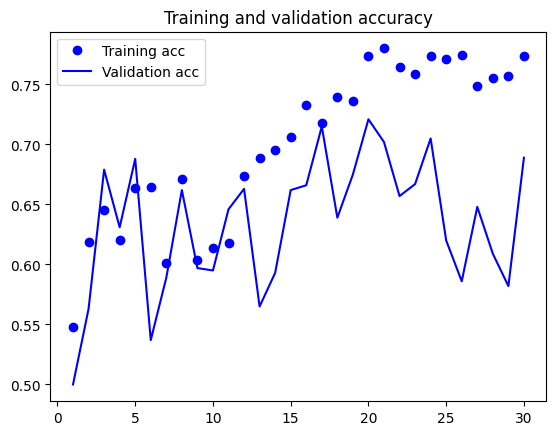

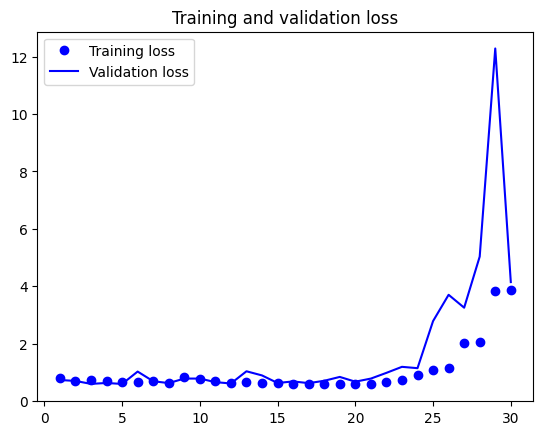

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.
# The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

In [38]:
# Using data augmentation
# Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data.
# Data augmentation takes the approach of generating more training data from existing training samples,
# by augmenting the samples via a number of random transformations that yield believable-looking images.

# In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator

In [39]:
# defining a new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

In [40]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [41]:
# Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [43]:
# train using data augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
)

Epoch 1/100


2023-10-07 09:21:42.363012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.7492 - acc: 0.5180

2023-10-07 09:21:49.229946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 9s 76ms/step - loss: 0.7492 - acc: 0.5180 - val_loss: 0.6902 - val_acc: 0.5680
Epoch 2/100
100/100 [==============================] - 8s 75ms/step - loss: 0.7070 - acc: 0.5140 - val_loss: 0.6939 - val_acc: 0.5020
Epoch 3/100
100/100 [==============================] - 7s 73ms/step - loss: 0.7011 - acc: 0.5560 - val_loss: 0.6404 - val_acc: 0.6270
Epoch 4/100
100/100 [==============================] - 7s 73ms/step - loss: 0.6976 - acc: 0.5835 - val_loss: 0.6943 - val_acc: 0.6020
Epoch 5/100
100/100 [==============================] - 7s 73ms/step - loss: 0.6622 - acc: 0.6130 - val_loss: 0.6392 - val_acc: 0.5950
Epoch 6/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6465 - acc: 0.6125 - val_loss: 1.0290 - val_acc: 0.5620
Epoch 7/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6654 - acc: 0.6225 - val_loss: 0.6176 - val_acc: 0.6340
Epoch 8/100
100/100 [==============================] - 8s 75ms/step - loss

In [44]:
model.save('trained_models/cats_and_dogs_small_2.h5')

/Users/jcolamendy/python/ml-tutorials/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


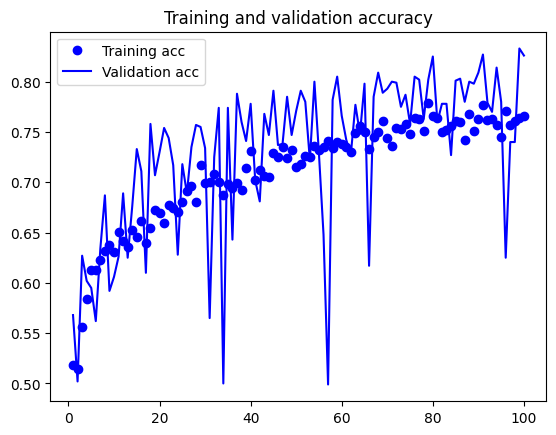

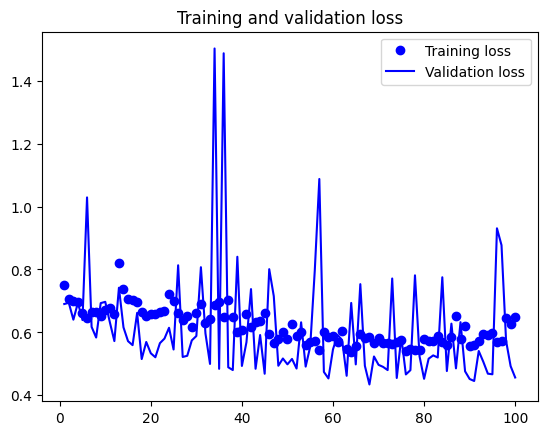

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
# Using a pretrained convnet - feature extraction
# Feature extraction consists of taking the convolutional base of a previously trained network
# running the new data through it, and training a new classifier on top of the output
# Use the convolutional base of the VGG16 network, trained on ImageNet, to extract interesting features from cat and dog images, 
# and then train a dogs-versus-cats classifier on top of these features

In [47]:
# Instantiating the VGG16 convolutional base
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', # specifies the weight checkpoint from which to initialize the model
              include_top=False, # refers to including (or not) the densely connected classifier on top of the network
              input_shape=(150, 150, 3), # shape of the image tensors that you’ll feed to the network
)

In [48]:
conv_base.summary()
# The final feature map has shape (4, 4, 512)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [49]:
# pretrained convnet - feature extraction without data augmentation

In [50]:
# imports
import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    # init
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    i=0
    # logic
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    # result
    return features, labels

In [51]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.


2023-10-07 09:34:23.215757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 10ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 10ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 10ms/step


In [52]:
train_features.shape

(2000, 4, 4, 512)

In [53]:
res = train_features[0:2]
res.shape

(2, 4, 4, 512)

In [54]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [55]:
train_features.shape

(2000, 8192)

In [56]:
# At this point, you can define your densely connected classifier (note the use of drop- out for regularization) 
# and train it on the data and labels that you just recorded.
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [57]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [58]:
# train the model
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
  1/100 [..............................] - ETA: 33s - loss: 1.4766 - acc: 0.3000

2023-10-07 09:34:45.919564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 10ms/step - loss: 0.7529 - acc: 0.7920 - val_loss: 0.3217 - val_acc: 0.8700


2023-10-07 09:34:46.845597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 2/30
100/100 [==============================] - 1s 8ms/step - loss: 0.3809 - acc: 0.8620 - val_loss: 0.9043 - val_acc: 0.6870
Epoch 3/30
100/100 [==============================] - 1s 8ms/step - loss: 0.3260 - acc: 0.8745 - val_loss: 0.2768 - val_acc: 0.8970
Epoch 4/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2441 - acc: 0.8980 - val_loss: 0.2665 - val_acc: 0.8970
Epoch 5/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2273 - acc: 0.9130 - val_loss: 0.4109 - val_acc: 0.8630
Epoch 6/30
100/100 [==============================] - 1s 8ms/step - loss: 0.1823 - acc: 0.9295 - val_loss: 0.3049 - val_acc: 0.8960
Epoch 7/30
100/100 [==============================] - 1s 8ms/step - loss: 0.1755 - acc: 0.9365 - val_loss: 0.2952 - val_acc: 0.8920
Epoch 8/30
100/100 [==============================] - 1s 9ms/step - loss: 0.1564 - acc: 0.9375 - val_loss: 0.4032 - val_acc: 0.8740
Epoch 9/30
100/100 [==============================] - 1s 8ms/step - loss: 0.

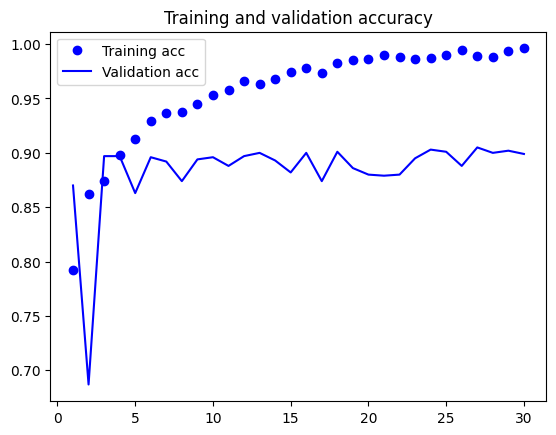

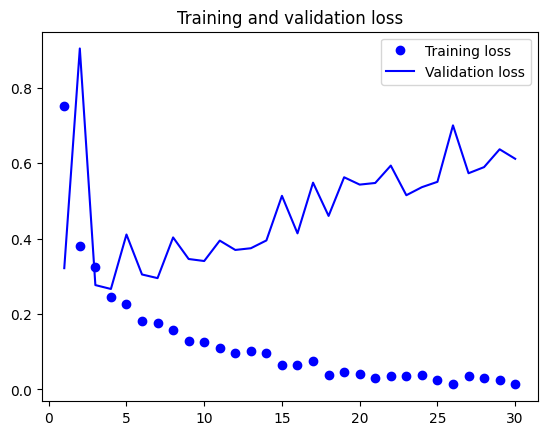

In [59]:
# plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Notes:
# - You reach a validation accuracy of about 90%
# - But the plots also indicate that you’re overfitting almost from the start
# - That’s because this technique doesn’t use data augmentation, which is essential for preventing overfitting with small image datasets.

In [ ]:
# pretrained convnet - feature extraction with data augmentation
# extend the conv_base model and running it end to end on the inputs
# Note:
# - this technique is so expensive that you should only attempt it if you have access to a GPU—it’s absolutely intractable on CPU

In [60]:
# add a model (like conv_base) to a Sequential model just like you would add a layer
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# Before you compile and train the model, need to to freeze the convolu- tional base.
# Freezing a layer or set of layers means preventing their weights from being updated during training.
# In Keras, you freeze a network by setting its trainable attribute to False.
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights before freezing the conv base: 4


In [63]:
# Note that in order for these changes to take effect, you must first compile the model.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [64]:
# define data generators
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [65]:
# create generators
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [66]:
# train
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30


2023-10-07 09:53:29.936695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.8757 - acc: 0.6845

2023-10-07 09:53:36.954320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 10s 98ms/step - loss: 0.8757 - acc: 0.6845 - val_loss: 0.4590 - val_acc: 0.7850
Epoch 2/30
100/100 [==============================] - 10s 100ms/step - loss: 0.5265 - acc: 0.7755 - val_loss: 0.3045 - val_acc: 0.8630
Epoch 3/30
100/100 [==============================] - 10s 98ms/step - loss: 0.4704 - acc: 0.7890 - val_loss: 0.3184 - val_acc: 0.8570
Epoch 4/30
100/100 [==============================] - 10s 100ms/step - loss: 0.4515 - acc: 0.8080 - val_loss: 0.3798 - val_acc: 0.8300
Epoch 5/30
100/100 [==============================] - 10s 96ms/step - loss: 0.3871 - acc: 0.8295 - val_loss: 0.3844 - val_acc: 0.8480
Epoch 6/30
100/100 [==============================] - 10s 96ms/step - loss: 0.4077 - acc: 0.8220 - val_loss: 0.2694 - val_acc: 0.8920
Epoch 7/30
100/100 [==============================] - 10s 97ms/step - loss: 0.4346 - acc: 0.8080 - val_loss: 0.2733 - val_acc: 0.8860
Epoch 8/30
100/100 [==============================] - 10s 97ms/step - l

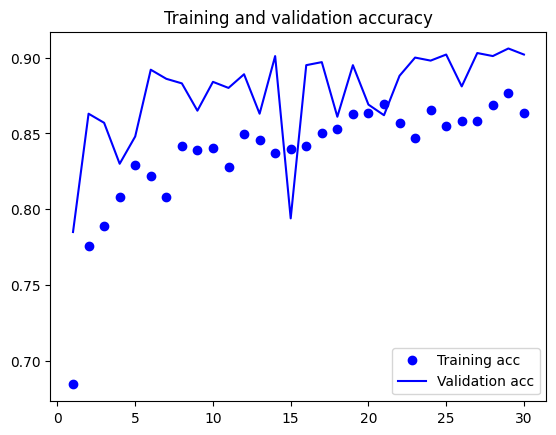

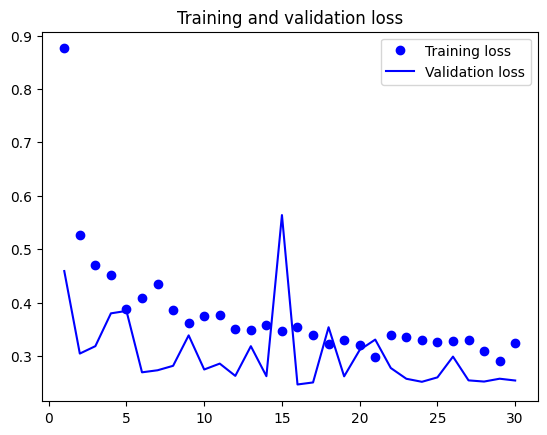

In [67]:
# plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Notes
# -  you have reached a validation accuracy of about 90%

In [ ]:
# Using a pretrained convnet - fine-tuning
# Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction,
# and jointly training both the newly added part of the model (in this case, the fully connected classifier) and these top layers.
# This is called fine-tuning because it slightly adjusts the more abstract representations of the model being reused, 
# in order to make them more rele- vant for the problem at hand.

# The steps for fine-tuning a network are as follow:
# - Add your custom network on top of an already trained base network
# - Freeze the base network
# - Train the part you added
# - Unfreeze some layers in the base network
# - Jointly train both these layers and the part you added

# Already completed the first three steps when doing feature extraction.

In [68]:
# See the base model
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# Fine-tune the last three convolutional layers, which means:
# - all layers up to block4_pool should be frozen
# - and the layers block5_conv1, block5_conv2, and block5_conv3 should be trainable
# So, it’s a good strategy to fine-tune only the top two or three layers in the convolutional base.

In [69]:
# Freezing all layers up to a specific one
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
# Now you can begin fine-tuning the network.
# Do this with the RMSProp optimizer, using a very low learning rate.
# The reason for using a low learning rate is that you want to limit 
# the magnitude of the modifications you make to the representations of the three layers you’re fine-tuning. 
# Updates that are too large may harm these rep- resentations.

In [ ]:
# compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [70]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100


/var/folders/cg/xkrtyvkn46v_d07jqjh0zkp40000gn/T/ipykernel_20001/856708308.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


100/100 [==============================] - 10s 98ms/step - loss: 0.3064 - acc: 0.8690 - val_loss: 0.2783 - val_acc: 0.8980
Epoch 2/100
100/100 [==============================] - 10s 96ms/step - loss: 0.3173 - acc: 0.8555 - val_loss: 0.2598 - val_acc: 0.9020
Epoch 3/100
100/100 [==============================] - 10s 95ms/step - loss: 0.3057 - acc: 0.8680 - val_loss: 0.3277 - val_acc: 0.8710
Epoch 4/100
100/100 [==============================] - 10s 95ms/step - loss: 0.3080 - acc: 0.8720 - val_loss: 0.3155 - val_acc: 0.8740
Epoch 5/100
100/100 [==============================] - 10s 95ms/step - loss: 0.2994 - acc: 0.8710 - val_loss: 0.3537 - val_acc: 0.8670
Epoch 6/100
100/100 [==============================] - 10s 95ms/step - loss: 0.3208 - acc: 0.8570 - val_loss: 0.2484 - val_acc: 0.9030
Epoch 7/100
100/100 [==============================] - 10s 95ms/step - loss: 0.3051 - acc: 0.8640 - val_loss: 0.2504 - val_acc: 0.8990
Epoch 8/100
100/100 [==============================] - 10s 95ms/ste

In [71]:
model.save('trained_models/cats_and_dogs_small_3.h5')

/Users/jcolamendy/python/ml-tutorials/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


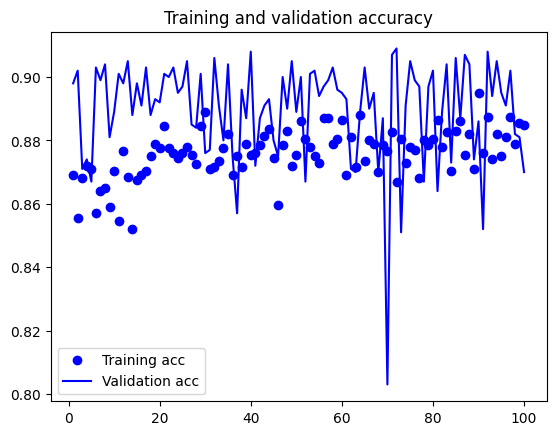

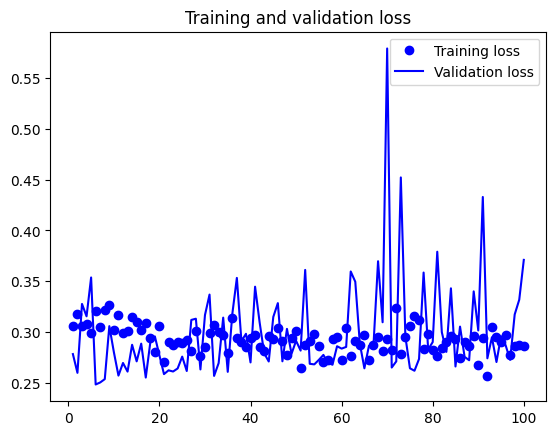

In [72]:
# plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Notes
# -  you have reached a validation accuracy of about 90%

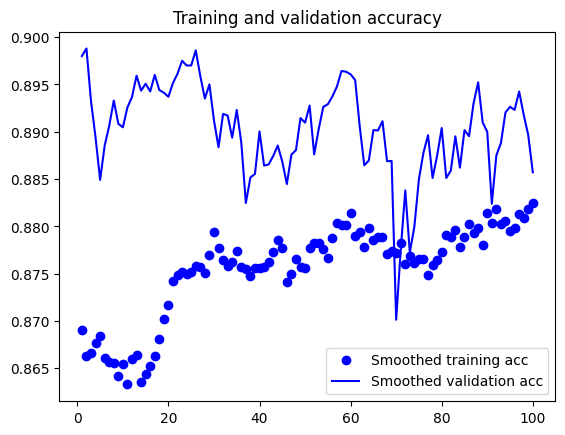

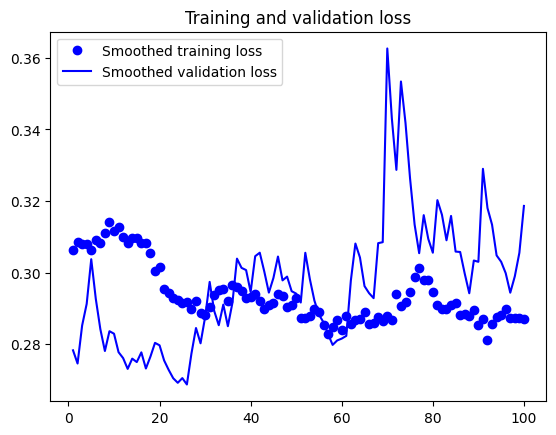

In [73]:
# These curves look noisy
# Smooth them by replacing every loss and accuracy with exponential moving averages of these quanti- ties.

def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [74]:
# Evaluate the model
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [76]:
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test loss:', test_loss)
print('test acc:', test_acc)

50/50 [==============================] - 3s 62ms/step - loss: 0.3364 - acc: 0.8890
test loss: 0.3363865613937378
test acc: 0.8890000581741333


In [98]:
# test generator
test_image_batch, test_label_batch = test_generator[0]
print(test_image_batch.shape)
print(test_label_batch.shape)

(20, 150, 150, 3)
(20,)


In [89]:
test_image_batch, test_label_batch = test_generator[30]
print(test_image_batch.shape)
print(test_label_batch.shape)

(20, 150, 150, 3)
(20,)


In [99]:
probs = model.predict(test_image_batch)
print(probs)

1/1 [==============================] - 0s 20ms/step
[[3.7028417e-02]
 [1.1454638e-03]
 [1.0895115e-02]
 [9.3727562e-05]
 [1.2468875e-06]
 [2.8196754e-02]
 [1.0000000e+00]
 [9.9999583e-01]
 [1.0382200e-03]
 [9.5364792e-09]
 [2.1445178e-03]
 [6.2826216e-01]
 [3.7414316e-04]
 [9.7470158e-01]
 [7.0578206e-01]
 [6.3588808e-04]
 [3.4833872e-03]
 [9.9999464e-01]
 [1.2905675e-01]
 [8.4683245e-01]]
